### **Logistics**

1. **Team**: 

    - **Sepehr Akbari**

    - **Matthew Galindo**

2. **Assignment**:

    - CSCI 450: Computer Vision & Machine Learning

        - Project 1

3. **Data**:

    - Name: *Blood Cells Image Dataset*
    
    - Source: [Kaggle](https://www.kaggle.com/datasets/unclesamulus/blood-cells-image-dataset)


# **Blood Cell Classification System**

**Objective:**

<br>

**Table of Contents:**

1. [Setup](#setup)

2. [Preprocessing](#preprocessing)

    - [Handling Inconsistensies](#handling-inconsistensies)

    - [Sampling](#sampling)

    - [Wrapping Up](#wrapping-up)

3. [Normalization](#normalization)

4. [Segmentation](#segmentation)

5. [Defining Features](#defining-features)

    - [Color Histograms](#color-histograms)

    - [Histogram of Oriented Gradients (HOG)](#histogram-of-oriented-gradients-hog)

    - [Local Binary Patterns (LBP)](#local-binary-patterns-lbp)

    - [Gabor Filters](#gabor-filters)

    - [Global Image Structure Tensor (GIST)](#global-image-structure-tensor-gist)

    - [Hu Moments](#hu-moments)

    - [Zernike Moments](#zernike-moments)

    - [Wavelet Textures](#wavelet-textures)

    - [Haralick Textures](#haralick-textures)

6. [Feature Extraction](#feature-extraction)

7. [Modeling](#modeling)

    - [Logistic Regression](#logistic-regression)

    - [K-Nearest Neighbors](#k-nearest-neighbors)

    - [Linear Support Vector Machine](#linear-support-vector-machine)

    - [RBF Support Vector Machine](#kernel-support-vector-machine)

    - [Random Forest](#random-forest)

    - [AdaBoost](#adaboost)

    - [XGBoost](#xgboost)

8. [Model Evaluation](#model-evaluation)

9. [Detecting Anomalies](#detecting-anomalies)

10. [Model Explainability](#model-explainability)

11. [App](#app)



<br>

**Interating with this Notebook:**

Setions of this notebook which include code for data cleaning and feature extraction, are extremely computationally expensive. The recommended appraoch is to run sections 2.3, 6, and one's marked by commented code, on a GPU enabled cluster computing environment.

## Setup

1. **Importing libraries**

In [81]:
import math
import os
import random
import shutil
import warnings

import dill as pickle
import mahotas
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pywt
import seaborn as sns

import lime
import lime.lime_tabular

from skimage import color, exposure, filters, io, morphology, measure, transform, util, feature
from sklearn.ensemble import IsolationForest
from skimage.feature import graycomatrix, graycoprops, hog, local_binary_pattern
from skimage.filters import gaussian, gabor, median
from skimage.morphology import disk

from sklearn.ensemble import AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, mean_squared_error, precision_score, recall_score, r2_score
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC

import xgboost as xgb

2. **Silencing warnings**

In [2]:
warnings.filterwarnings('ignore')

3. **Setting Random State**

In [3]:
rs = 450

4. **Defining paths to the data (images)**

In [4]:
original_data_path = '../Data/bloodcells_dataset'
cleaned_data_path = '../Data/bloodcells_dataset_cleaned'

5. **Defining the classes for classification**

In [5]:
cell_types = ['basophil', 'eosinophil', 'erythroblast', 'ig', 'lymphocyte', 'monocyte', 'neutrophil', 'platelet']

## Preprocessing

1. **Reading images in the data folder**

In [6]:
def get_image_files(folder_path):
    valid_extensions = ('.png', '.jpg', '.jpeg')
    return [f for f in os.listdir(folder_path) if f.lower().endswith(valid_extensions)]

2. **Creating a folder for the preprocessed (cleaned) images**

In [7]:
if not os.path.exists(cleaned_data_path):
    os.makedirs(cleaned_data_path)

3. **Openning Images**

In [8]:
## DO NOT RUN LOCALLY
# for cell_type in cell_types:
#     src_folder = os.path.join(original_data_path, cell_type)
#     dest_folder = os.path.join(cleaned_data_path, cell_type)
    
#     if not os.path.exists(dest_folder):
#         os.makedirs(dest_folder)
    
#     image_files = get_image_files(src_folder)

### **Handling Inconsistensies**

In [9]:
target_shape = (363, 360, 3)

In [10]:
## DO NOT RUN LOCALLY
# valid_images = []
# for fname in image_files:
#     print(f"Processing {fname}")
#     src_file_path = os.path.join(src_folder, fname)
#     try:
#         image = io.imread(src_file_path)
#         if image.shape == target_shape:
#             valid_images.append(fname)
#     except Exception as e:
#         print(f"Error processing {src_file_path}: {e}")

### **Sampling**

In [11]:
num_images_per_class = 500

In [12]:
## DO NOT RUN LOCALLY
# if len(valid_images) < num_images_per_class:
#     print(f"Warning: Only found {len(valid_images)} valid images for class {cell_type}.")
#     selected_images = valid_images
# else:
#     print(f"sampling {cell_type}")
#     selected_images = random.sample(valid_images, num_images_per_class)

### **Wrapping up**

In [13]:
## DO NOT RUN LOCALLY
# for cell_type in cell_types:
#     print(f"\nProcessing {cell_type}\n")
#     src_folder = os.path.join(original_data_path, cell_type)
#     dest_folder = os.path.join(cleaned_data_path, cell_type)
    
#     if not os.path.exists(dest_folder):
#         os.makedirs(dest_folder)
    
#     image_files = get_image_files(src_folder)
    
#     valid_images = []
#     count = 0
#     for fname in image_files:
#         print(f"Processing {count+1}/{len(image_files)}")
#         count += 1
#         src_file_path = os.path.join(src_folder, fname)
#         try:
#             image = io.imread(src_file_path)
#             if image.shape == target_shape:
#                 valid_images.append(fname)
#         except Exception as e:
#             print(f"Error processing {src_file_path}: {e}")

#     print(f"Sampling {cell_type}")
#     if len(valid_images) < num_images_per_class:
#         print(f"Warning: Only found {len(valid_images)} valid images for class {cell_type}.")
#         selected_images = valid_images
#     else:
#         print(f"sampling {cell_type}")
#         selected_images = random.sample(valid_images, num_images_per_class)
    
#     print(f"Copying {cell_type}")
#     for fname in selected_images:
#         print(f"Finishing up {cell_type}")
#         src_file_path = os.path.join(src_folder, fname)
#         dest_file_path = os.path.join(dest_folder, fname)
#         shutil.copy(src_file_path, dest_file_path)

# print("\n\nData cleaning completed.\n")

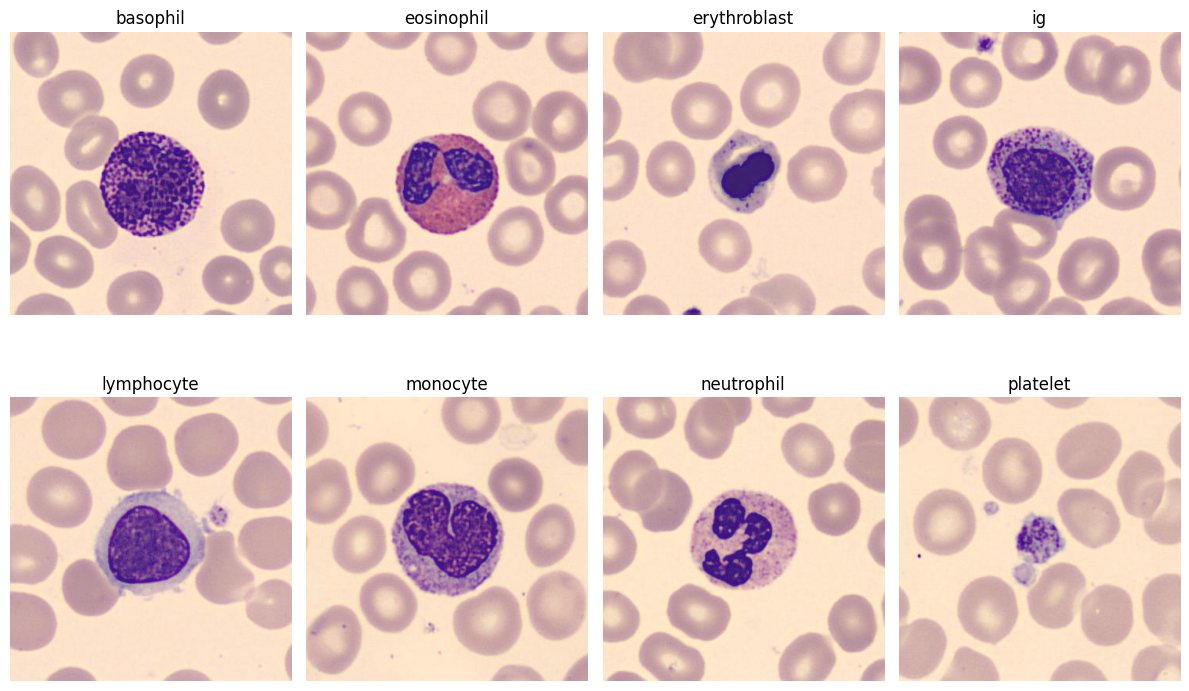

In [14]:
plt.figure(figsize=(12, 8))
for i, cell_type in enumerate(cell_types):
    folder_path = os.path.join(cleaned_data_path, cell_type)
    image_files = get_image_files(folder_path)
    
    if image_files:
        sample_image_path = os.path.join(folder_path, image_files[0])
        image = io.imread(sample_image_path)
        
        plt.subplot(2, 4, i+1)
        plt.imshow(image)
        plt.title(cell_type)
        plt.axis('off')

plt.tight_layout()
plt.show()

## Normalization

1. **Defining the normalization function**

In [15]:
def imNormalize(image):
    if len(image.shape) == 2:
        r = image
        g = image
        b = image
    else:
        r = image[:, :, 0]
        g = image[:, :, 1]
        b = image[:, :, 2]
    
    r = r - r.min()
    r = r / r.max()
    r = np.uint8(r * 255)
    
    g = g - g.min()
    g = g / g.max()
    g = np.uint8(g * 255)
    
    b = b - b.min()
    b = b / b.max()
    b = np.uint8(b * 255)
    
    return np.stack((r, g, b), axis=2)

2. **Testing on a sample image**

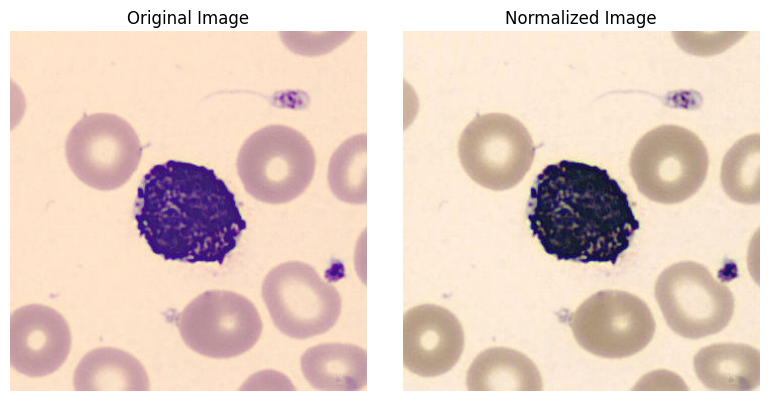

In [16]:
sample_image_path = '../Data/bloodcells_dataset_cleaned/basophil/BA_580.jpg'
sample_image = io.imread(sample_image_path)
normalized_im = imNormalize(sample_image)

fig, (org, norm) = plt.subplots(1, 2, figsize=(8, 4))
org.imshow(sample_image)
org.set_title('Original Image')
org.axis('off')

norm.imshow(normalized_im)
norm.set_title('Normalized Image')
norm.axis('off')

plt.tight_layout()
plt.show()

## Segmentation

1. **Defining the segmentation function**

In [17]:
def segment_cell(image, sigma=1, median_size=3, min_size=50, hole_area=50):
    gray_image = color.rgb2gray(image)
    
    smooth_image = gaussian(gray_image, sigma=sigma)
    smooth_image = median(smooth_image)
    
    thresh = filters.threshold_otsu(smooth_image)
    
    mask = smooth_image < thresh
    mask = morphology.remove_small_objects(mask, min_size=min_size)
    mask = morphology.remove_small_holes(mask, area_threshold=hole_area)
    
    labels = measure.label(mask)
    if labels.max() != 0:
        regions = measure.regionprops(labels)
        largest_region = max(regions, key=lambda r: r.area)
        mask = labels == largest_region.label

    segmented = image.copy()
    segmented[~mask] = 0

    return segmented, mask

2. **Testing on a sample image**

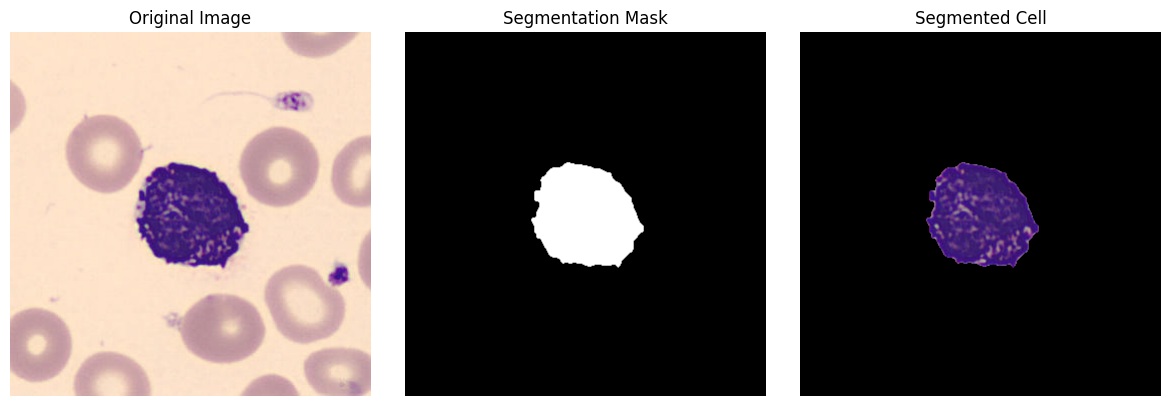

In [18]:
segmented, mask = segment_cell(sample_image)

fig, (org, msk, seg) = plt.subplots(1, 3, figsize=(12, 4))
org.imshow(sample_image)
org.set_title('Original Image')
org.axis('off')

msk.imshow(mask, cmap='gray')
msk.set_title('Segmentation Mask')
msk.axis('off')

seg.imshow(segmented)
seg.set_title('Segmented Cell')
seg.axis('off')

plt.tight_layout()
plt.show()

## Defining Features

### **Color Histograms**

In [19]:
def extract_color_histogram(image, num_bins=8):
    chans = []
    features = {}
    channels = ['R', 'G', 'B']
    for i in range(3):
        hist, _ = np.histogram(image[:,:,i], bins=num_bins, range=(0, 255))
        hist = hist.astype("float")
        hist /= (hist.sum() + 1e-7)
        for b in range(num_bins):
            features[f"color_hist_{channels[i]}_bin{b}"] = hist[b]
    return features

### **Histogram of Oriented Gradients (HOG)**

In [20]:
def extract_hog_features(image, pixels_per_cell=(16, 16), cells_per_block=(2, 2), orientations=9):
    gray = color.rgb2gray(image)
    hog_vector, _ = hog(gray, orientations=orientations, pixels_per_cell=pixels_per_cell,
                      cells_per_block=cells_per_block, block_norm='L2-Hys',
                      visualize=True, feature_vector=True)
    features = {}
    for i, val in enumerate(hog_vector):
        features[f"hog_{i}"] = val
    return features

### **Local Binary Patterns (LBP)**

In [21]:
def extract_lbp_features(image, radius=1, n_points=8, num_bins=10):
    gray = color.rgb2gray(image)
    lbp = local_binary_pattern(gray, n_points, radius, method='uniform')
    hist, _ = np.histogram(lbp.ravel(), bins=num_bins, range=(0, num_bins))
    hist = hist.astype("float")
    hist /= (hist.sum() + 1e-7)
    features = {}
    for i, val in enumerate(hist):
        features[f"lbp_bin{i}"] = val
    return features

### **Gabor Filters**

In [22]:
def extract_gabor_features(image, frequency=0.6):
    gray = color.rgb2gray(image)
    filt_real, filt_imag = gabor(gray, frequency=frequency)
    features = {
        "gabor_mean": np.mean(filt_real),
        "gabor_std": np.std(filt_real)
    }
    return features

### **Global Image Structure Tensor (GIST)**

In [23]:
def extract_gist_features_with_keys(image, num_blocks=1, frequencies=[0.1, 0.3], thetas=[0, np.pi/2]):
    gray = color.rgb2gray(image)
    h, w = gray.shape
    block_h = math.floor(h / num_blocks)
    block_w = math.floor(w / num_blocks)
    features = {}
    
    for freq in frequencies:
        for theta in thetas:
            filt_real, _ = gabor(gray, frequency=freq, theta=theta)
            mean_val = np.mean(filt_real)
            std_val = np.std(filt_real)
            key_mean = f"gist_f{freq}_t{theta}_global_mean"
            key_std = f"gist_f{freq}_t{theta}_global_std"
            features[key_mean] = mean_val
            features[key_std] = std_val
    return features

### **Hu Moments**

In [24]:
def extract_hu_moments(mask):
    moments = measure.moments(mask.astype(float))
    hu = measure.moments_hu(moments)
    features = {}
    for i, val in enumerate(hu):
        features[f"hu_{i}"] = val
    return features

### **Zernike Moments**

In [25]:
def extract_zernike_moments(mask, radius, degree_list=[2, 4]):
    features = {}
    mask_uint8 = (mask * 255).astype(np.uint8)
    center = (mask.shape[0] // 2, mask.shape[1] // 2)
    
    for degree in degree_list:
        zm_vector = mahotas.features.zernike_moments(mask_uint8, radius, degree, center)
        features[f"zernike_deg{degree}"] = np.mean(zm_vector)
    return features

### **Wavelet Textures**

In [26]:
def extract_wavelet_features(image):
    gray = color.rgb2gray(image)
    coeffs = pywt.dwt2(gray, 'haar')
    cA, (cH, cV, cD) = coeffs
    features = {
        "wavelet_mean": np.mean(cA),
        "wavelet_std": np.std(cA)
    }
    return features

### **Haralick Textures**

In [27]:
def extract_haralick_features(image):
    gray = color.rgb2gray(image)
    gray_uint8 = (gray * 255).astype(np.uint8)
    glcm = feature.graycomatrix(gray_uint8, distances=[1], angles=[0, np.pi/4, np.pi/2, 3*np.pi/4],
                        symmetric=True, normed=True)
    props = ['contrast', 'correlation', 'energy', 'homogeneity']
    features = {}
    for prop in props:
        feat = graycoprops(glcm, prop)
        features[f"haralick_{prop}"] = np.mean(feat)
    return features

## Feature Extraction

1. **Sementing, and creating a feature dictionary**

In [28]:
def extract_features_dict(image):
    segmented, mask = segment_cell(image)
    
    features = {}

    features.update(extract_color_histogram(segmented, num_bins=8))
    features.update(extract_hog_features(segmented, pixels_per_cell=(16,16), cells_per_block=(2,2), orientations=9))
    features.update(extract_lbp_features(segmented, radius=1, n_points=8, num_bins=10))
    features.update(extract_gabor_features(segmented, frequency=0.6))
    features.update(extract_gist_features_with_keys(segmented, num_blocks=1, frequencies=[0.1, 0.3], thetas=[0, np.pi/2]))
    features.update(extract_hu_moments(mask))
    features.update(extract_zernike_moments(mask, min(mask.shape) / 2, degree_list=[2,4]))
    features.update(extract_wavelet_features(segmented))
    features.update(extract_haralick_features(segmented))
    
    return features

2. **Building the feature vector**

In [29]:
## DO NOT RUN LOCALLY
# data_records = []

In [30]:
## DO NOT RUN LOCALLY
# for cell_type in cell_types:
#     print(f"\nStarting {cell_type}")
#     folder_path = os.path.join(cleaned_data_path, cell_type)
#     image_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
    
#     count = 0
#     for fname in image_files:
#         print(f"Processing {count+1}/{len(image_files)}")
#         count += 1
#         file_path = os.path.join(folder_path, fname)
#         try:
#             image = io.imread(file_path)
#             feat_dict = extract_features_dict(image)
#             record = {
#                 'filename': file_path,
#                 'label': cell_type
#             }
#             record.update(feat_dict)
#             data_records.append(record)
#         except Exception as e:
#             print(f"Error processing {file_path}: {e}")
#     print(f"{cell_type} done!\n")
    
# print("\nSaving...")

# df = pd.DataFrame(data_records)
# df.to_csv('bloodcells_dataset_cleaned_features.csv', index=False)
# print("Features saved")

## Modeling

1. **Loading the Feature Vector**

In [31]:
feature_vector = pd.read_csv('../Data/bloodcells_dataset_cleaned_features.csv')
feature_vector.shape

(4000, 15937)

In [32]:
feature_vector.head()

filename     label  \
0  Data/bloodcells_dataset_cleaned/basophil/BA_22...  basophil   
1  Data/bloodcells_dataset_cleaned/basophil/BA_41...  basophil   
2  Data/bloodcells_dataset_cleaned/basophil/BA_45...  basophil   
3  Data/bloodcells_dataset_cleaned/basophil/BA_55...  basophil   
4  Data/bloodcells_dataset_cleaned/basophil/BA_48...  basophil   

   color_hist_R_bin0  color_hist_R_bin1  color_hist_R_bin2  color_hist_R_bin3  \
0           0.924901           0.006313           0.028183           0.021931   
1           0.896886           0.008020           0.031114           0.029385   
2           0.873607           0.024036           0.043664           0.030142   
3           0.919521           0.018205           0.035147           0.017325   
4           0.902785           0.013453           0.035797           0.023454   

   color_hist_R_bin4  color_hist_R_bin5  color_hist_R_bin6  color_hist_R_bin7  \
0           0.010897           0.007553           0.000222                0.0   
1           0.018871           0.014891           0.000834                0.0   
2           0.018649           0.009298           0.000605                0.0   
3           0.007499           0.002189           0.000115                0.0   
4           0.016070           0.008088           0.000352                0.0   

   ...          hu_5          hu_6  zernike_deg2  zernike_deg4  wavelet_mean  \
0  ...  2.047494e+31 -2.177429e+41      0.298558      0.267032      0.042387   
1  ...  5.970696e+31 -8.833448e+40      0.291606      0.249002      0.064941   
2  ...  9.924610e+31 -5.106395e+42      0.282557      0.230753      0.066747   
3  ...  2.615320e+31 -8.174179e+41      0.300183      0.269986      0.037143   
4  ...  3.710127e+31 -2.240111e+42      0.293357      0.254065      0.054459   

   wavelet_std  haralick_contrast  haralick_correlation  haralick_energy  \
0     0.159215          51.363779              0.939946         0.923438   
1     0.202917         168.849413              0.883895         0.892882   
2     0.191914         116.109491              0.908695         0.870939   
3     0.134333          54.746513              0.911700         0.917987   
4     0.181276          89.438322              0.920561         0.900803   

   haralick_homogeneity  
0              0.932722  
1              0.901252  
2              0.882741  
3              0.926811  
4              0.909216  

[5 rows x 15937 columns]

2. **Splitting features and classification class**

In [33]:
feature_cols = [col for col in feature_vector.columns if col not in ['filename', 'label']]
X = feature_vector[feature_cols].values
y = feature_vector['label'].values

3. **Encoding the classes**

In [34]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)

4. **Scaling the features**

In [35]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

5. **Splitting the data into training and testing sets (80/20)**

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=rs, stratify=y_encoded)

In [37]:
results = {}

### **Logistic Regression**

1. **Building the model**

In [38]:
lr = LogisticRegression(random_state=rs, max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
results['Logistic Regression'] = y_pred_lr

2. **Performance**

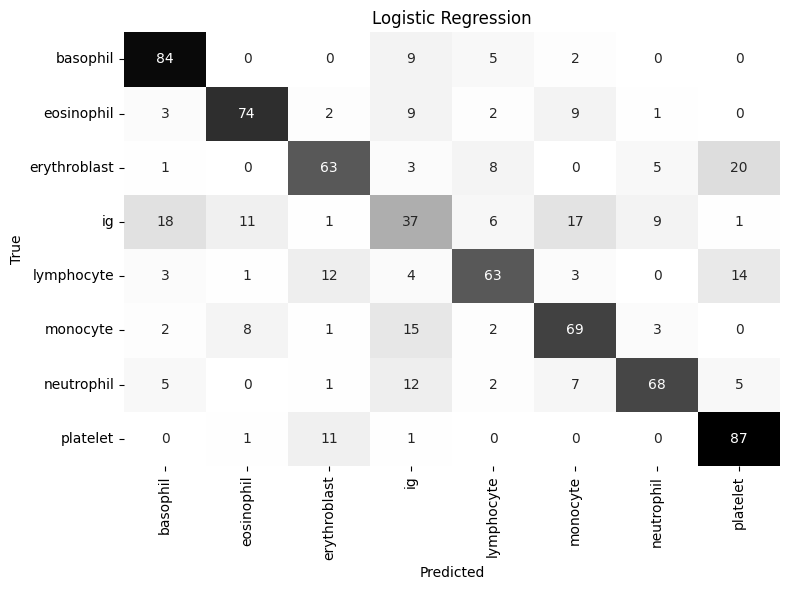

In [39]:
lr_cm = confusion_matrix(y_test, y_pred_lr)

plt.figure(figsize=(8, 6))
sns.heatmap(lr_cm, annot=True, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_, cmap='Greys', cbar=False)
plt.title('Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.tight_layout()
plt.show()

3. **Metrics Evaluation**

In [40]:
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr, average='weighted', zero_division=0)
recall_lr = recall_score(y_test, y_pred_lr, average='weighted', zero_division=0)
f1_lr = f1_score(y_test, y_pred_lr, average='weighted', zero_division=0)

print(f"Results - Logistic Regression:\n\nMSE: {mse_lr}\nR^2: {r2_lr}\nAccuracy: {accuracy_lr}\nPrecision: {precision_lr}\nRecall: {recall_lr}\nF1 Score: {f1_lr}\n\nReport:\n{classification_report(y_test, y_pred_lr, target_names=le.classes_)}")

Results - Logistic Regression:

MSE: 3.22125
R^2: 0.38642857142857145
Accuracy: 0.68125
Precision: 0.6803762564206107
Recall: 0.68125
F1 Score: 0.677561717118574

Report:
              precision    recall  f1-score   support

    basophil       0.72      0.84      0.78       100
  eosinophil       0.78      0.74      0.76       100
erythroblast       0.69      0.63      0.66       100
          ig       0.41      0.37      0.39       100
  lymphocyte       0.72      0.63      0.67       100
    monocyte       0.64      0.69      0.67       100
  neutrophil       0.79      0.68      0.73       100
    platelet       0.69      0.87      0.77       100

    accuracy                           0.68       800
   macro avg       0.68      0.68      0.68       800
weighted avg       0.68      0.68      0.68       800



### **K-Nearest Neighbors**

1. **Building the model**

In [41]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
results['KNN'] = y_pred_knn

2. **Performance**

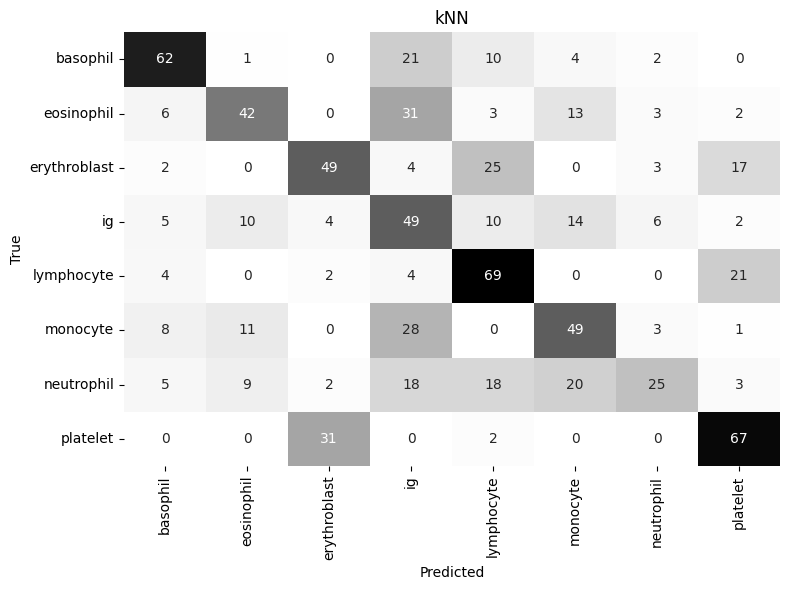

In [42]:
cm_knn = confusion_matrix(y_test, y_pred_knn)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_, cmap='Greys', cbar=False)
plt.title('kNN')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.tight_layout()
plt.show()

3. **Metrics Evaluation**

In [43]:
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn, average='weighted', zero_division=0)
recall_knn = recall_score(y_test, y_pred_knn, average='weighted', zero_division=0)
f1_knn = f1_score(y_test, y_pred_knn, average='weighted', zero_division=0)

print(f"Results - kNN:\n\nMSE: {mse_knn}\nR^2: {r2_knn}\nAccuracy: {accuracy_knn}\nPrecision: {precision_knn}\nRecall: {recall_knn}\nF1 Score: {f1_knn}\n\nReport:\n{classification_report(y_test, y_pred_knn, target_names=le.classes_)}")

Results - kNN:

MSE: 5.13375
R^2: 0.02214285714285713
Accuracy: 0.515
Precision: 0.5380013509456031
Recall: 0.515
F1 Score: 0.5113089907257301

Report:
              precision    recall  f1-score   support

    basophil       0.67      0.62      0.65       100
  eosinophil       0.58      0.42      0.49       100
erythroblast       0.56      0.49      0.52       100
          ig       0.32      0.49      0.38       100
  lymphocyte       0.50      0.69      0.58       100
    monocyte       0.49      0.49      0.49       100
  neutrophil       0.60      0.25      0.35       100
    platelet       0.59      0.67      0.63       100

    accuracy                           0.52       800
   macro avg       0.54      0.52      0.51       800
weighted avg       0.54      0.52      0.51       800



### **Linear Support Vector Machine**

1. **Building the model**

In [44]:
svm_lin = SVC(kernel='linear', random_state=rs)
svm_lin.fit(X_train, y_train)
y_pred_svm_lin = svm_lin.predict(X_test)
results['SVM Linear'] = y_pred_svm_lin

2. **Performance**

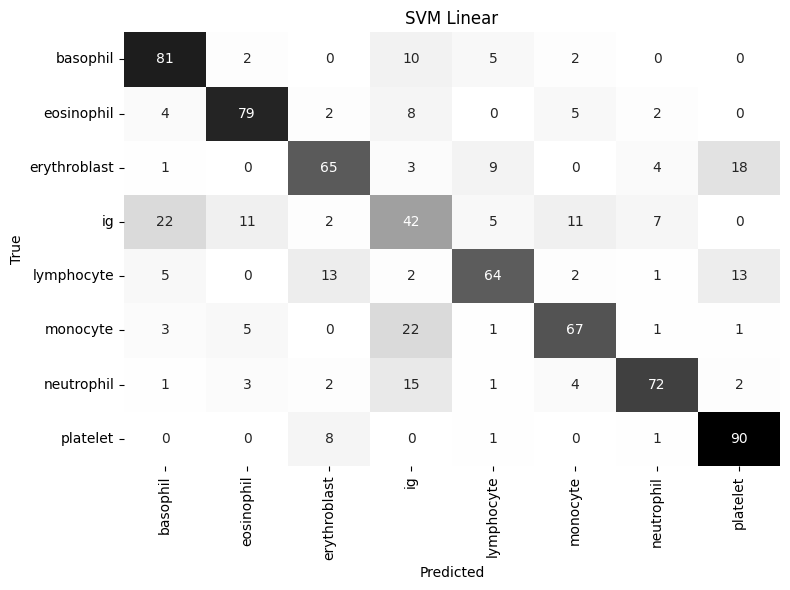

In [45]:
cm_svm_lin = confusion_matrix(y_test, y_pred_svm_lin)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm_lin, annot=True, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_, cmap='Greys', cbar=False)
plt.title('SVM Linear')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.tight_layout()
plt.show()

3. **Metrics Evaluation**

In [46]:
mse_svm_lin = mean_squared_error(y_test, y_pred_svm_lin)
r2_svm_lin = r2_score(y_test, y_pred_svm_lin)
accuracy_svm_lin = accuracy_score(y_test, y_pred_svm_lin)
precision_svm_lin = precision_score(y_test, y_pred_svm_lin, average='weighted', zero_division=0)
recall_svm_lin = recall_score(y_test, y_pred_svm_lin, average='weighted', zero_division=0)
f1_svm_lin = f1_score(y_test, y_pred_svm_lin, average='weighted', zero_division=0)

print(f"Results - SVM Linear:\n\nMSE: {mse_svm_lin}\nR^2: {r2_svm_lin}\nAccuracy: {accuracy_svm_lin}\nPrecision: {precision_svm_lin}\nRecall: {recall_svm_lin}\nF1 Score: {f1_svm_lin}\n\nReport:\n{classification_report(y_test, y_pred_svm_lin, target_names=le.classes_)}")

Results - SVM Linear:

MSE: 2.88375
R^2: 0.45071428571428573
Accuracy: 0.7
Precision: 0.7031290237363207
Recall: 0.7
F1 Score: 0.6985925369140696

Report:
              precision    recall  f1-score   support

    basophil       0.69      0.81      0.75       100
  eosinophil       0.79      0.79      0.79       100
erythroblast       0.71      0.65      0.68       100
          ig       0.41      0.42      0.42       100
  lymphocyte       0.74      0.64      0.69       100
    monocyte       0.74      0.67      0.70       100
  neutrophil       0.82      0.72      0.77       100
    platelet       0.73      0.90      0.80       100

    accuracy                           0.70       800
   macro avg       0.70      0.70      0.70       800
weighted avg       0.70      0.70      0.70       800



### **Kernel Support Vector Machine**

1. **Building the model**

In [47]:
svm_rbf = SVC(kernel='rbf', random_state=rs)
svm_rbf.fit(X_train, y_train)
y_pred_svm_rbf = svm_rbf.predict(X_test)
results['SVM RBF'] = y_pred_svm_rbf

2. **Performance**

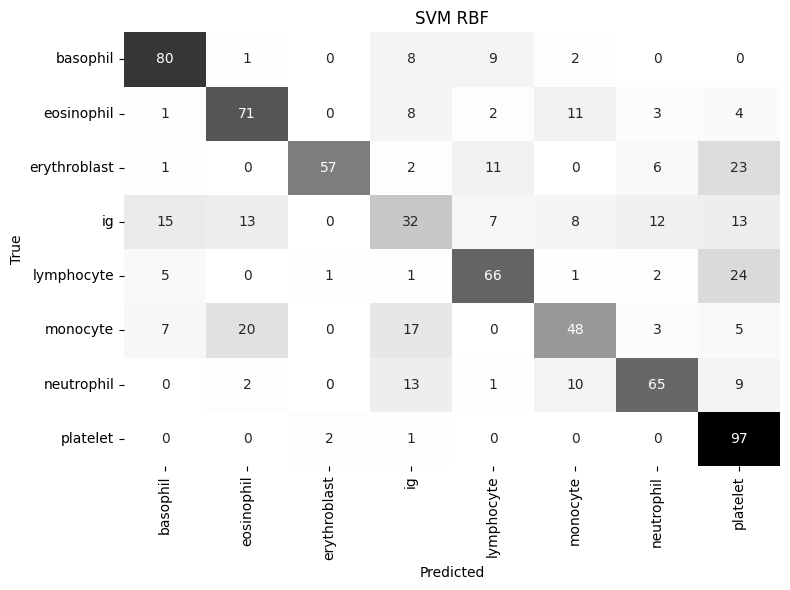

In [48]:
cm_svm_rbf = confusion_matrix(y_test, y_pred_svm_rbf)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm_rbf, annot=True, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_, cmap='Greys', cbar=False)
plt.title('SVM RBF')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.tight_layout()
plt.show()

3. **Metrics Evaluation**

In [49]:
mse_svm_rbf = mean_squared_error(y_test, y_pred_svm_rbf)
r2_svm_rbf = r2_score(y_test, y_pred_svm_rbf)
accuracy_svm_rbf = accuracy_score(y_test, y_pred_svm_rbf)
precision_svm_rbf = precision_score(y_test, y_pred_svm_rbf, average='weighted', zero_division=0)
recall_svm_rbf = recall_score(y_test, y_pred_svm_rbf, average='weighted', zero_division=0)
f1_svm_rbf = f1_score(y_test, y_pred_svm_rbf, average='weighted', zero_division=0)

print(f"Results - SVM RBF:\n\nMSE: {mse_svm_rbf}\nR^2: {r2_svm_rbf}\nAccuracy: {accuracy_svm_rbf}\nPrecision: {precision_svm_rbf}\nRecall: {recall_svm_rbf}\nF1 Score: {f1_svm_rbf}\n\nReport:\n{classification_report(y_test, y_pred_svm_rbf, target_names=le.classes_)}")

Results - SVM RBF:

MSE: 3.91
R^2: 0.25523809523809526
Accuracy: 0.645
Precision: 0.6617264608760065
Recall: 0.645
F1 Score: 0.6385718084801677

Report:
              precision    recall  f1-score   support

    basophil       0.73      0.80      0.77       100
  eosinophil       0.66      0.71      0.69       100
erythroblast       0.95      0.57      0.71       100
          ig       0.39      0.32      0.35       100
  lymphocyte       0.69      0.66      0.67       100
    monocyte       0.60      0.48      0.53       100
  neutrophil       0.71      0.65      0.68       100
    platelet       0.55      0.97      0.71       100

    accuracy                           0.65       800
   macro avg       0.66      0.65      0.64       800
weighted avg       0.66      0.65      0.64       800



### **Random Forest**

1. **Building the model**

In [50]:
rf = RandomForestClassifier(random_state=rs)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
results['Random Forest'] = y_pred_rf

2. **Performance**

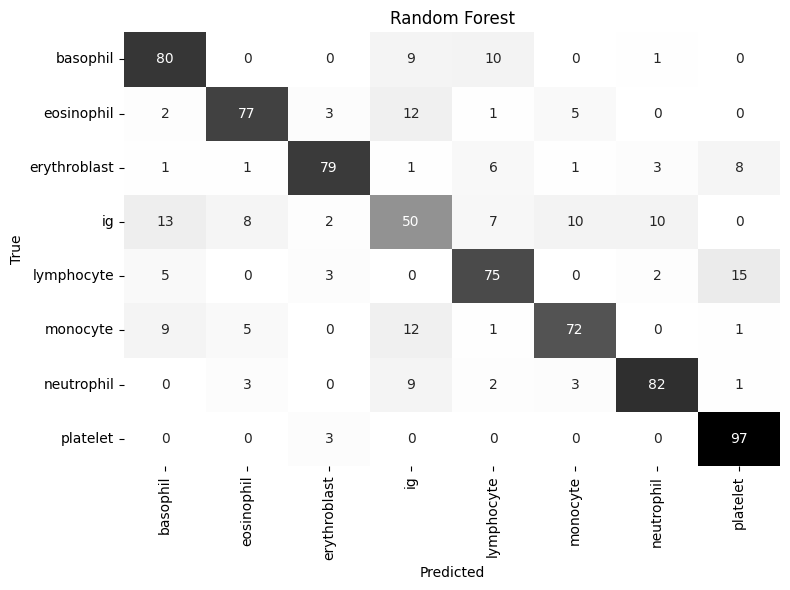

In [51]:
cm_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_, cmap='Greys', cbar=False)
plt.title('Random Forest')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.tight_layout()
plt.show()

3. **Metrics Evaluation**

In [52]:
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted', zero_division=0)
recall_rf = recall_score(y_test, y_pred_rf, average='weighted', zero_division=0)
f1_rf = f1_score(y_test, y_pred_rf, average='weighted', zero_division=0)

print(f"Results - Random Forest:\n\nMSE: {mse_rf}\nR^2: {r2_rf}\nAccuracy: {accuracy_rf}\nPrecision: {precision_rf}\nRecall: {recall_rf}\nF1 Score: {f1_rf}\n\nReport:\n{classification_report(y_test, y_pred_rf, target_names=le.classes_)}")

Results - Random Forest:

MSE: 2.2875
R^2: 0.5642857142857143
Accuracy: 0.765
Precision: 0.765019177471173
Recall: 0.765
F1 Score: 0.7630113148052382

Report:
              precision    recall  f1-score   support

    basophil       0.73      0.80      0.76       100
  eosinophil       0.82      0.77      0.79       100
erythroblast       0.88      0.79      0.83       100
          ig       0.54      0.50      0.52       100
  lymphocyte       0.74      0.75      0.74       100
    monocyte       0.79      0.72      0.75       100
  neutrophil       0.84      0.82      0.83       100
    platelet       0.80      0.97      0.87       100

    accuracy                           0.77       800
   macro avg       0.77      0.77      0.76       800
weighted avg       0.77      0.77      0.76       800



### **AdaBoost**

1. **Building the model**

In [53]:
adb = AdaBoostClassifier(random_state=rs)
adb.fit(X_train, y_train)
y_pred_adb = adb.predict(X_test)
results['AdaBoost'] = y_pred_adb

2. **Performance**

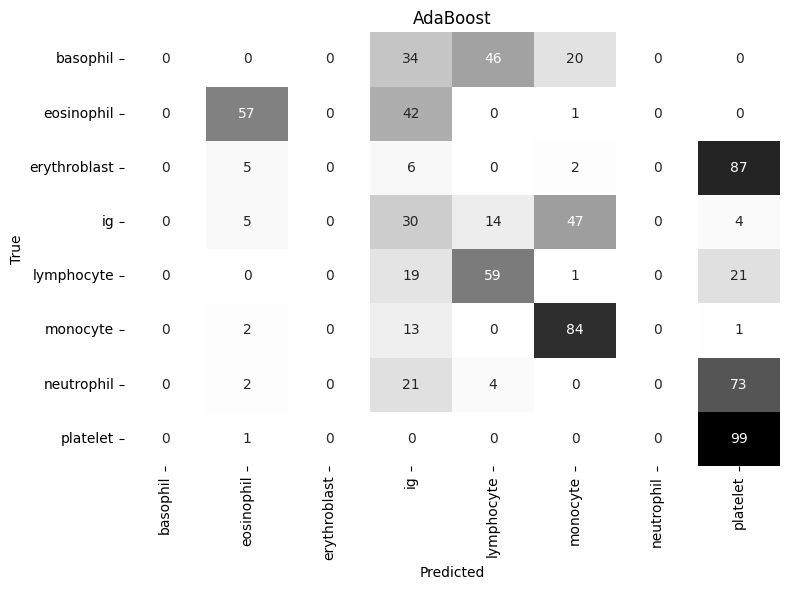

In [54]:
cm_adb = confusion_matrix(y_test, y_pred_adb)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_adb, annot=True, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_, cmap='Greys', cbar=False)
plt.title('AdaBoost')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.tight_layout()
plt.show()

3. **Metrics Evaluation**

In [55]:
mse_adb = mean_squared_error(y_test, y_pred_adb)
r2_adb = r2_score(y_test, y_pred_adb)
accuracy_adb = accuracy_score(y_test, y_pred_adb)
precision_adb = precision_score(y_test, y_pred_adb, average='weighted', zero_division=0)
recall_adb = recall_score(y_test, y_pred_adb, average='weighted', zero_division=0)
f1_adb = f1_score(y_test, y_pred_adb, average='weighted', zero_division=0)

print(f"Results - AdaBoost:\n\nMSE: {mse_adb}\nR^2: {r2_adb}\nAccuracy: {accuracy_adb}\nPrecision: {precision_adb}\nRecall: {recall_adb}\nF1 Score: {f1_adb}\n\nReport:\n{classification_report(y_test, y_pred_adb, target_names=le.classes_)}")

Results - AdaBoost:

MSE: 6.09625
R^2: -0.1611904761904761
Accuracy: 0.41125
Precision: 0.29280794376955194
Recall: 0.41125
F1 Score: 0.32393287722178754

Report:
              precision    recall  f1-score   support

    basophil       0.00      0.00      0.00       100
  eosinophil       0.79      0.57      0.66       100
erythroblast       0.00      0.00      0.00       100
          ig       0.18      0.30      0.23       100
  lymphocyte       0.48      0.59      0.53       100
    monocyte       0.54      0.84      0.66       100
  neutrophil       0.00      0.00      0.00       100
    platelet       0.35      0.99      0.51       100

    accuracy                           0.41       800
   macro avg       0.29      0.41      0.32       800
weighted avg       0.29      0.41      0.32       800



### **XGBoost**

1. **Building the model**

In [56]:
model_xgb = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=rs)
model_xgb.fit(X_train, y_train)
y_pred_xgb = model_xgb.predict(X_test)
results['XGBoost'] = y_pred_xgb

2. **Performance**

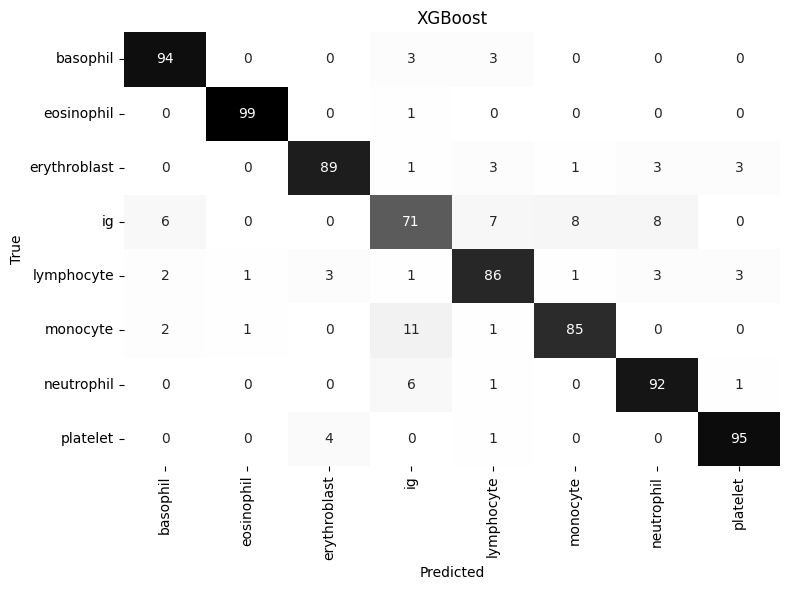

In [57]:
cm_xgb = confusion_matrix(y_test, y_pred_xgb)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_xgb, annot=True, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_, cmap='Greys', cbar=False)
plt.title('XGBoost')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.tight_layout()
plt.show()

3. **Metrics Evaluation**

In [58]:
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb, average='weighted', zero_division=0)
recall_xgb = recall_score(y_test, y_pred_xgb, average='weighted', zero_division=0)
f1_xgb = f1_score(y_test, y_pred_xgb, average='weighted', zero_division=0)

print(f"Results - XGBoost:\n\nMSE: {mse_xgb}\nR^2: {r2_xgb}\nAccuracy: {accuracy_xgb}\nPrecision: {precision_xgb}\nRecall: {recall_xgb}\nF1 Score: {f1_xgb}\n\nReport:\n{classification_report(y_test, y_pred_xgb, target_names=le.classes_)}")

Results - XGBoost:

MSE: 0.9525
R^2: 0.8185714285714285
Accuracy: 0.88875
Precision: 0.8879522287807946
Recall: 0.88875
F1 Score: 0.8879804057150227

Report:
              precision    recall  f1-score   support

    basophil       0.90      0.94      0.92       100
  eosinophil       0.98      0.99      0.99       100
erythroblast       0.93      0.89      0.91       100
          ig       0.76      0.71      0.73       100
  lymphocyte       0.84      0.86      0.85       100
    monocyte       0.89      0.85      0.87       100
  neutrophil       0.87      0.92      0.89       100
    platelet       0.93      0.95      0.94       100

    accuracy                           0.89       800
   macro avg       0.89      0.89      0.89       800
weighted avg       0.89      0.89      0.89       800



## Model Evaluation

## Detecting Anomalies

1. **Splitting sets using indices**

In [59]:
indices = np.arange(len(feature_vector))
train_idx, test_idx = train_test_split(indices, test_size=0.2, random_state=rs, stratify=y_encoded)

X_train_idx = X[train_idx]
X_test_idx = X[test_idx]
y_train_idx = y_encoded[train_idx]
y_test_idx = y_encoded[test_idx]

2. **Saving dataframe with original info to test**

In [60]:
test_df = feature_vector.iloc[test_idx].copy()

3. **Clipping data to fit float32 format**

In [61]:
X_train_idx_clipped = np.clip(X_train_idx, -1e10, 1e10)
X_test_idx_clipped = np.clip(X_test_idx, -1e10, 1e10)

4. **Fitting an isolation forest model to the training data to compute anomaly scores**

- Higher scores = more normal

- 1 for normal, -1 for anomaly

In [62]:
iso_forest = IsolationForest(contamination=0.05, random_state=rs)
iso_forest.fit(X_train_idx_clipped)
anomaly_scores = iso_forest.decision_function(X_test_idx_clipped)
anomaly_preds = iso_forest.predict(X_test_idx_clipped)

In [63]:
print("Anomaly prediction distribution (value, count):")
print(np.unique(anomaly_preds, return_counts=True))

Anomaly prediction distribution (value, count):
(array([-1,  1]), array([ 42, 758]))


5. **Adding anomaly scores to the test dataframe**

In [64]:
test_df['anomaly_score'] = anomaly_scores

6. **Visualizing anomalies**

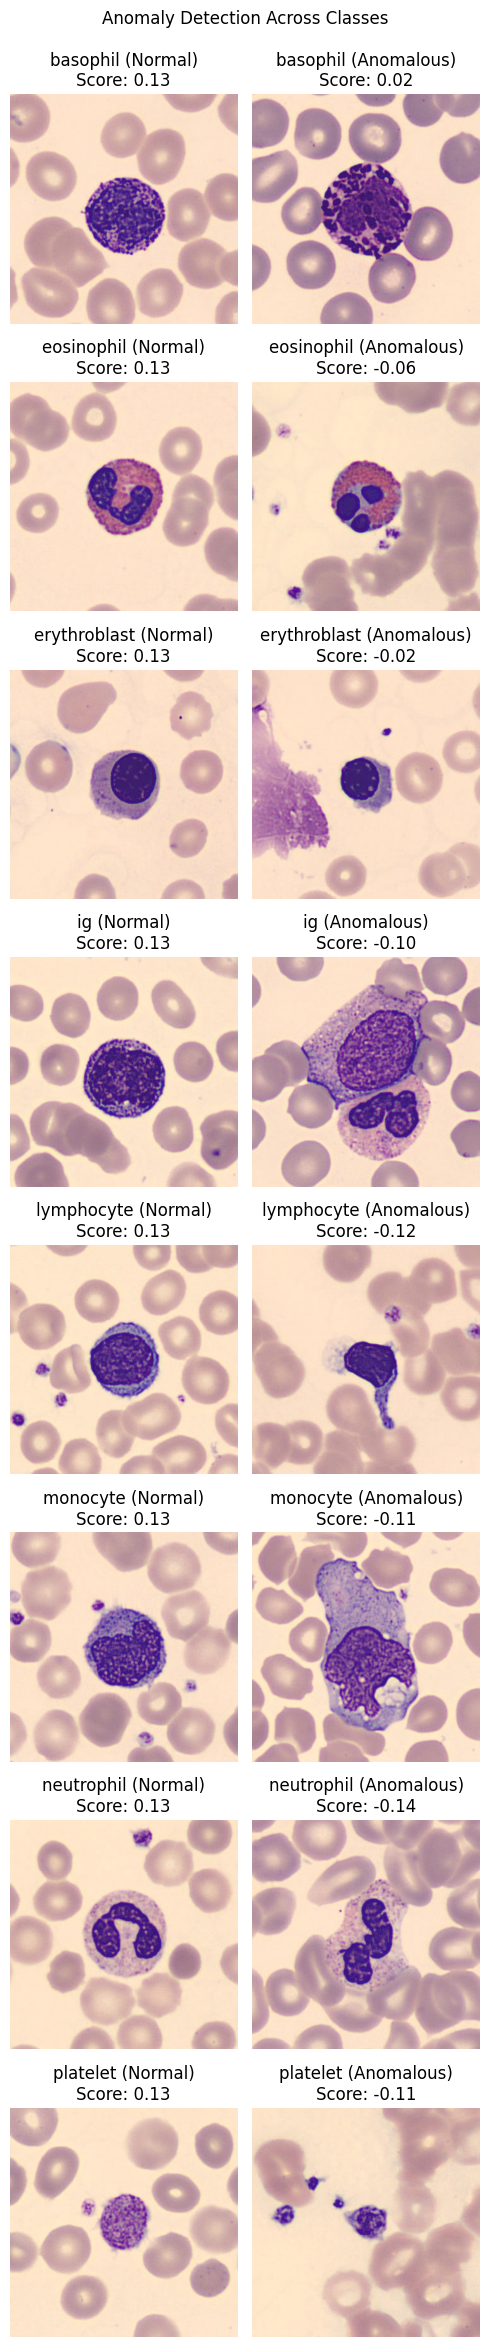

In [68]:
unique_classes = sorted(test_df['label'].unique())
n_classes = len(unique_classes)

fig, axes = plt.subplots(n_classes, 2, figsize=(5, 24))

for i, cls in enumerate(unique_classes):
    cls_df = test_df[test_df['label'] == cls]
    
    if cls_df.empty:
        continue
    
    normal_sample = cls_df.loc[cls_df['anomaly_score'].idxmax()]
    anomalous_sample = cls_df.loc[cls_df['anomaly_score'].idxmin()]

    normal_filename = normal_sample['filename'].replace("Data/", "../Data/")
    anomalous_filename = anomalous_sample['filename'].replace("Data/", "../Data/")
    
    normal_img = io.imread(normal_filename)
    anomalous_img = io.imread(anomalous_filename)
    
    axes[i, 0].imshow(normal_img)
    axes[i, 0].set_title(f"{cls} (Normal)\nScore: {normal_sample['anomaly_score']:.2f}")
    axes[i, 0].axis('off')
    
    axes[i, 1].imshow(anomalous_img)
    axes[i, 1].set_title(f"{cls} (Anomalous)\nScore: {anomalous_sample['anomaly_score']:.2f}")
    axes[i, 1].axis('off')

plt.suptitle("Anomaly Detection Across Classes\n\n")
plt.tight_layout()
plt.show()

## Model Explainability

1. **Initializing the LIME Tabular explainer**

In [71]:
lime_explainer = lime.lime_tabular.LimeTabularExplainer(
    X_train, 
    feature_names=feature_cols, 
    class_names=le.classes_, 
    discretize_continuous=True,
    random_state=rs
)

2. **Picking a random sample to test our explainer**

In [72]:
instance = X_test[rs]

3. **Explaining the prediction**

In [73]:
exp = lime_explainer.explain_instance(instance, model_xgb.predict_proba, num_features=len(feature_cols))
lime_explanation = exp.as_list()

4. **Grouping the columns by feature**

In [74]:
group_sums = {}
group_counts = {}

def get_feature_group(feature_name):
    fname = feature_name.lower()
    if "color_hist" in fname:
        return "Color Histogram"
    elif "hog_" in fname:
        return "HOG"
    elif "lbp" in fname:
        return "LBP"
    elif "gabor" in fname:
        return "Gabor"
    elif "gist" in fname:
        return "GIST"
    elif "hu_" in fname:
        return "Hu Moments"
    elif "zernike" in fname:
        return "Zernike Moments"
    elif "wavelet" in fname:
        return "Wavelet"
    elif "haralick" in fname:
        return "Haralick"
    else:
        return "Other"

for feat_desc, score in lime_explanation:
    group = get_feature_group(feat_desc)
    group_sums[group] = group_sums.get(group, 0) + abs(score)
    group_counts[group] = group_counts.get(group, 0) + 1

all_groups = ["Color Histogram", "HOG", "LBP", "Gabor", "GIST", 
              "Hu Moments", "Zernike Moments", "Wavelet", "Haralick"]

5. **Calculating the count, sum, and average contribution of each feature**

In [75]:
results_list = []
for group in all_groups:
    total = group_sums.get(group, 0)
    count = group_counts.get(group, 0)
    avg = total / count if count > 0 else 0
    results_list.append((group, avg))

6. **Sorting by average contribution**

In [76]:
results_list = sorted(results_list, key=lambda x: x[1], reverse=True)

print("Feature Contributions (in order):")
for i, (group, avg) in enumerate(results_list):
    print(f"{i+1}- {group} ({avg:.4f})")

Feature Contributions (in order):
1- Color Histogram (0.0168)
2- LBP (0.0094)
3- Hu Moments (0.0079)
4- Gabor (0.0071)
5- Zernike Moments (0.0070)
6- GIST (0.0066)
7- Wavelet (0.0065)
8- HOG (0.0059)
9- Haralick (0.0049)


## App

1. **Saving the best model**

In [77]:
with open('model_xgb.pkl', 'wb') as f:
    pickle.dump(model_xgb, f)

2. **Saving the Scaler**

In [78]:
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

3. **Saving the anomaly detection model**

In [79]:
with open('model_isol.pkl', 'wb') as f:
    pickle.dump(iso_forest, f)

4. **Saving the LIME Explainer**

In [82]:
with open('lime_explainer.pkl', 'wb') as f:
    pickle.dump(lime_explainer, f)

5. **Saving the feature extraction pipeline**

In [ ]:
class FeatureExtractor:
    def __init__(self):
        pass

    def segment_cell(self, image, sigma=1, median_size=3, min_size=50, hole_area=50):
        from skimage import color, filters, morphology, measure
        from skimage.filters import gaussian, median

        gray_image = color.rgb2gray(image)
        smooth_image = gaussian(gray_image, sigma=sigma)
        smooth_image = median(smooth_image)
        thresh = filters.threshold_otsu(smooth_image)
        mask = smooth_image < thresh
        mask = morphology.remove_small_objects(mask, min_size=min_size)
        mask = morphology.remove_small_holes(mask, area_threshold=hole_area)
        labels = measure.label(mask)
        if labels.max() != 0:
            regions = measure.regionprops(labels)
            largest_region = max(regions, key=lambda r: r.area)
            mask = labels == largest_region.label
        segmented = image.copy()
        segmented[~mask] = 0
        return segmented, mask
    
    def extract_color_histogram(self, image, num_bins=8):
        from skimage import color
        features = {}
        channels = ['R', 'G', 'B']
        for i in range(3):
            hist, _ = np.histogram(image[:,:,i], bins=num_bins, range=(0, 255))
            hist = hist.astype("float")
            hist /= (hist.sum() + 1e-7)
            for b in range(num_bins):
                features[f"color_hist_{channels[i]}_bin{b}"] = hist[b]
        return features

    def extract_hog_features(self, image, pixels_per_cell=(16, 16), cells_per_block=(2, 2), orientations=9):
        from skimage import color
        from skimage.feature import hog
        gray = color.rgb2gray(image)
        hog_vector, _ = hog(gray, orientations=orientations, pixels_per_cell=pixels_per_cell,
                            cells_per_block=cells_per_block, block_norm='L2-Hys',
                            visualize=True, feature_vector=True)
        features = {}
        for i, val in enumerate(hog_vector):
            features[f"hog_{i}"] = val
        return features

    def extract_lbp_features(self, image, radius=1, n_points=8, num_bins=10):
        from skimage import color
        from skimage.feature import local_binary_pattern
        gray = color.rgb2gray(image)
        lbp = local_binary_pattern(gray, n_points, radius, method='uniform')
        hist, _ = np.histogram(lbp.ravel(), bins=num_bins, range=(0, num_bins))
        hist = hist.astype("float")
        hist /= (hist.sum() + 1e-7)
        features = {}
        for i, val in enumerate(hist):
            features[f"lbp_bin{i}"] = val
        return features

    def extract_gabor_features(self, image, frequency=0.6):
        from skimage import color
        from skimage.filters import gabor
        gray = color.rgb2gray(image)
        filt_real, filt_imag = gabor(gray, frequency=frequency)
        features = {
            "gabor_mean": np.mean(filt_real),
            "gabor_std": np.std(filt_real)
        }
        return features

    def extract_gist_features_with_keys(self, image, num_blocks=1, frequencies=[0.1, 0.3], thetas=[0, np.pi/2]):
        from skimage import color
        from skimage.filters import gabor
        gray = color.rgb2gray(image)
        h, w = gray.shape
        block_h = math.floor(h / num_blocks)
        block_w = math.floor(w / num_blocks)
        features = {}
        for freq in frequencies:
            for theta in thetas:
                filt_real, _ = gabor(gray, frequency=freq, theta=theta)
                mean_val = np.mean(filt_real)
                std_val = np.std(filt_real)
                key_mean = f"gist_f{freq}_t{theta}_global_mean"
                key_std = f"gist_f{freq}_t{theta}_global_std"
                features[key_mean] = mean_val
                features[key_std] = std_val
        return features

    def extract_hu_moments(self, mask):
        from skimage import measure
        moments = measure.moments(mask.astype(float))
        hu = measure.moments_hu(moments)
        features = {}
        for i, val in enumerate(hu):
            features[f"hu_{i}"] = val
        return features

    def extract_zernike_moments(self, mask, radius, degree_list=[2, 4]):
        features = {}
        mask_uint8 = (mask * 255).astype(np.uint8)
        center = (mask.shape[0] // 2, mask.shape[1] // 2)
        for degree in degree_list:
            zm_vector = mahotas.features.zernike_moments(mask_uint8, radius, degree, center)
            features[f"zernike_deg{degree}"] = np.mean(zm_vector)
        return features

    def extract_wavelet_features(self, image):
        from skimage import color
        gray = color.rgb2gray(image)
        coeffs = pywt.dwt2(gray, 'haar')
        cA, (cH, cV, cD) = coeffs
        features = {
            "wavelet_mean": np.mean(cA),
            "wavelet_std": np.std(cA)
        }
        return features

    def extract_haralick_features(self, image):
        from skimage import color, feature
        from skimage.feature import graycoprops
        gray = color.rgb2gray(image)
        gray_uint8 = (gray * 255).astype(np.uint8)
        glcm = feature.graycomatrix(gray_uint8, distances=[1], angles=[0, np.pi/4, np.pi/2, 3*np.pi/4],
                                     symmetric=True, normed=True)
        props = ['contrast', 'correlation', 'energy', 'homogeneity']
        features = {}
        for prop in props:
            feat = graycoprops(glcm, prop)
            features[f"haralick_{prop}"] = np.mean(feat)
        return features

    def extract_features_dict(self, image):
        segmented, mask = self.segment_cell(image)
        features = {}
        features.update(self.extract_color_histogram(segmented, num_bins=8))
        features.update(self.extract_hog_features(segmented, pixels_per_cell=(16,16), cells_per_block=(2,2), orientations=9))
        features.update(self.extract_lbp_features(segmented, radius=1, n_points=8, num_bins=10))
        features.update(self.extract_gabor_features(segmented, frequency=0.6))
        features.update(self.extract_gist_features_with_keys(segmented, num_blocks=1, frequencies=[0.1, 0.3], thetas=[0, np.pi/2]))
        features.update(self.extract_hu_moments(mask))
        radius_val = min(mask.shape) / 2
        features.update(self.extract_zernike_moments(mask, radius_val, degree_list=[2,4]))
        features.update(self.extract_wavelet_features(segmented))
        features.update(self.extract_haralick_features(segmented))
        return features

if __name__ == "__main__":
    extractor = FeatureExtractor()

    with open(os.path.join("feature_extractor.pkl"), "wb") as f:
        pickle.dump(extractor, f)

6. **Run Flask app**